# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_20_agents/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
# def make_env():
#     def _thunk():
#         env = UnityEnvironment(file_name='Reacher_Windows_x86_64_single_agent/Reacher.exe')
#         return env
#     return _thunk()
# envs = [make_env() for i in range(5)]

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# count=0
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     count+=1
#     if np.any(dones) or count>1e100:                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [7]:
# import torch
# from agent import AgentDDPG
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# agent= AgentDDPG(brain.vector_observation_space_size, brain.vector_action_space_size, 42, num_agents)

In [8]:
# #### testing the enviroment
# def test_env(model=agent):
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     count=0
#     while True:
#         actions = model.act(states) # select an action (for each agent)
# #         actions = np.clip(actions.sample().detach().cpu().numpy(), -1, 1)    # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         count+=1
#         if np.any(dones) or count>1000:                                  # exit loop if episode finished
#             break
#     return scores
# # test_env().mean()

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
import torch
from agent import AgentDDPG
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
agent= AgentDDPG(brain.vector_observation_space_size, brain.vector_action_space_size, num_agents, 42)

Episode 1	Average Score: 0.72	Score: 0.72
Episode 2	Average Score: 0.68	Score: 0.63
Episode 3	Average Score: 0.56	Score: 0.31
Episode 4	Average Score: 0.51	Score: 0.37
Episode 5	Average Score: 0.48	Score: 0.34
Episode 6	Average Score: 0.44	Score: 0.23
Episode 7	Average Score: 0.45	Score: 0.56
Episode 8	Average Score: 0.44	Score: 0.37
Episode 9	Average Score: 0.44	Score: 0.41
Episode 10	Average Score: 0.42	Score: 0.25
Episode 11	Average Score: 0.42	Score: 0.42
Episode 12	Average Score: 0.42	Score: 0.39
Episode 13	Average Score: 0.43	Score: 0.60
Episode 14	Average Score: 0.45	Score: 0.63
Episode 15	Average Score: 0.48	Score: 0.94
Episode 16	Average Score: 0.55	Score: 1.61
Episode 17	Average Score: 0.61	Score: 1.59
Episode 18	Average Score: 0.70	Score: 2.16
Episode 19	Average Score: 0.77	Score: 2.13
Episode 20	Average Score: 0.84	Score: 2.11
Episode 21	Average Score: 0.91	Score: 2.32
Episode 22	Average Score: 0.98	Score: 2.55
Episode 23	Average Score: 1.08	Score: 3.07
Episode 24	Average S

Episode 184	Average Score: 34.34	Score: 37.54
Episode 185	Average Score: 34.43	Score: 36.76
Episode 186	Average Score: 34.53	Score: 37.30
Episode 187	Average Score: 34.63	Score: 36.93
Episode 188	Average Score: 34.69	Score: 36.26
Episode 189	Average Score: 34.77	Score: 37.52
Episode 190	Average Score: 34.86	Score: 37.72
Episode 191	Average Score: 34.93	Score: 37.26
Episode 192	Average Score: 34.99	Score: 35.81
Episode 193	Average Score: 35.04	Score: 36.11
Episode 194	Average Score: 35.09	Score: 35.78
Episode 195	Average Score: 35.15	Score: 36.70
Episode 196	Average Score: 35.21	Score: 35.34
Solved Enviroment in  196 Average Score: 35.21021421299037


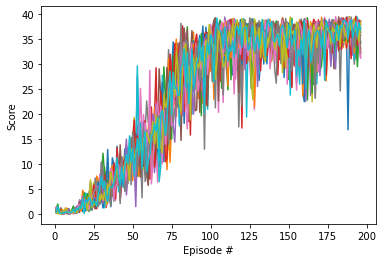

In [10]:
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt
def ddpg(n_episodes=300, max_t=1000):
    scores = []
    scores_deque = deque(maxlen=100)
    max_score = -np.Inf
    
    for i_episode in range(1, n_episodes):
        agent.reset()
        score = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for t_step in range(1, max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score += rewards                                   # update the score (for each agent)
            if t_step%20==0:
                agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            if np.any(dones):
                break
                
        scores_deque.append(np.mean(score))
        scores.append(score)
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score)))

        if np.min(scores_deque) >= 30:
            print('Solved Enviroment in ', i_episode, 'Average Score:', np.mean(scores_deque))
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

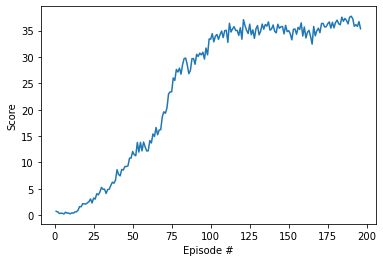

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(np.mean(scores, 1))+1), np.mean(scores, 1))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [11]:
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt
from agent import AgentA2C
import torch
agent=AgentA2C(env_info.vector_observations.shape[1], brain.vector_action_space_size)

env_info = env.reset(train_mode=True)[brain_name]

def compute_returns(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step].unsqueeze(1) + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

def a2c(agent=agent, n_episodes=500, eps_start=1.0, eps_end=0.01, eps_decay=0.995, max_t= 700):
    scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in tqdm(range(1, n_episodes+1)):
        log_probs = []
        values    = []
        rewards   = []
        masks     = []
        entropy = 0
        frame_idx=0
        score = np.zeros(num_agents)                          # initialize the score (for each agent)
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        while True:
            action, dist, value = agent.act(states)                 # select an action (for each agent)
            env_info = env.step(action.detach().cpu().numpy())[brain_name]  # send all actions to tne environment
            next_states = env_info.vector_observations      # get next state (for each agent)
            reward = env_info.rewards                       # get reward (for each agent)
            dones = env_info.local_done                     # see if episode finished

            log_prob = dist.log_prob(action)
            entropy += dist.entropy().mean()

            log_probs.append(log_prob)
            values.append(value)
            rewards.append(torch.FloatTensor(reward).to(device))
            masks.append(1 -torch.FloatTensor(dones).unsqueeze(1).to(device))
            states = next_states
            score += np.array(reward)
#             if i_episode % 100 == 0:
#                 test_rewards.append(np.mean([test_env() for _ in range(2)]))
#                 plot(frame_idx, test_rewards)
            if np.any(dones):
                break

        next_states = torch.FloatTensor(next_states).to(device)
        _, _, next_value = agent.act(next_states.cpu())
        returns = compute_returns(next_value, rewards, masks)

        log_probs = torch.cat(log_probs)
        returns   = torch.cat(returns).detach()
        values    = torch.cat(values)

        advantage = returns - values

        actor_loss  = -(log_probs * advantage.detach()).mean()
        critic_loss = advantage.pow(2).mean()
        loss = actor_loss + 0.5 * critic_loss - 0.001 * entropy

        agent.optimizer.zero_grad()
        loss.backward()
        agent.optimizer.step()
        print("i_episode:", i_episode, ' score:', np.mean(score), 'loss:', loss.data)
            
    return scores

a2c()

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

i_episode: 1  score: 0.5294999881647527 loss: tensor(4.3902, device='cuda:0')


  0%|▏                                                                                 | 1/500 [00:05<48:11,  5.79s/it]

i_episode: 2  score: 0.3294999926351011 loss: tensor(2.3309, device='cuda:0')


  0%|▎                                                                                 | 2/500 [00:11<46:38,  5.62s/it]

i_episode: 3  score: 0.43699999023228886 loss: tensor(2.5165, device='cuda:0')


  1%|▍                                                                                 | 3/500 [00:16<44:59,  5.43s/it]

i_episode: 4  score: 0.48899998906999825 loss: tensor(2.6441, device='cuda:0')


  1%|▋                                                                                 | 4/500 [00:21<43:53,  5.31s/it]

i_episode: 5  score: 0.7339999835938216 loss: tensor(2.0590, device='cuda:0')


  1%|▊                                                                                 | 5/500 [00:25<42:50,  5.19s/it]

i_episode: 6  score: 0.6404999856837094 loss: tensor(0.7263, device='cuda:0')


  1%|▉                                                                                 | 6/500 [00:30<42:13,  5.13s/it]

i_episode: 7  score: 0.6154999862425029 loss: tensor(-0.3231, device='cuda:0')


  1%|█▏                                                                                | 7/500 [00:35<41:28,  5.05s/it]

i_episode: 8  score: 0.4324999903328717 loss: tensor(-1.0615, device='cuda:0')


  2%|█▎                                                                                | 8/500 [00:40<40:57,  5.00s/it]

i_episode: 9  score: 0.6309999858960509 loss: tensor(-1.5187, device='cuda:0')


  2%|█▍                                                                                | 9/500 [00:45<40:46,  4.98s/it]

i_episode: 10  score: 0.5674999873153865 loss: tensor(-1.7879, device='cuda:0')


  2%|█▌                                                                               | 10/500 [00:50<40:32,  4.96s/it]

i_episode: 11  score: 0.5249999882653356 loss: tensor(-1.8584, device='cuda:0')


  2%|█▊                                                                               | 11/500 [00:55<40:19,  4.95s/it]

i_episode: 12  score: 0.48349998919293286 loss: tensor(-1.9516, device='cuda:0')


  2%|█▉                                                                               | 12/500 [01:00<40:00,  4.92s/it]

i_episode: 13  score: 0.35949999196454885 loss: tensor(-1.8737, device='cuda:0')


  3%|██                                                                               | 13/500 [01:05<40:29,  4.99s/it]

i_episode: 14  score: 0.4894999890588224 loss: tensor(-1.7074, device='cuda:0')


  3%|██▎                                                                              | 14/500 [01:10<40:29,  5.00s/it]

i_episode: 15  score: 0.4484999899752438 loss: tensor(-1.4804, device='cuda:0')


  3%|██▍                                                                              | 15/500 [01:15<40:13,  4.98s/it]

i_episode: 16  score: 0.5799999870359898 loss: tensor(-1.2249, device='cuda:0')


  3%|██▌                                                                              | 16/500 [01:20<39:41,  4.92s/it]

i_episode: 17  score: 0.4944999889470637 loss: tensor(-0.9562, device='cuda:0')


  3%|██▊                                                                              | 17/500 [01:25<39:24,  4.90s/it]

i_episode: 18  score: 0.3504999921657145 loss: tensor(-0.8259, device='cuda:0')


  4%|██▉                                                                              | 18/500 [01:29<38:55,  4.85s/it]

i_episode: 19  score: 0.3719999916851521 loss: tensor(-0.7692, device='cuda:0')


  4%|███                                                                              | 19/500 [01:34<38:38,  4.82s/it]

i_episode: 20  score: 0.367999991774559 loss: tensor(-0.8564, device='cuda:0')


  4%|███▏                                                                             | 20/500 [01:39<38:29,  4.81s/it]

i_episode: 21  score: 0.3719999916851521 loss: tensor(-0.9515, device='cuda:0')


  4%|███▍                                                                             | 21/500 [01:44<38:09,  4.78s/it]

i_episode: 22  score: 0.4484999899752438 loss: tensor(-1.1136, device='cuda:0')


  4%|███▌                                                                             | 22/500 [01:48<38:01,  4.77s/it]

i_episode: 23  score: 0.41649999069049953 loss: tensor(-1.3316, device='cuda:0')


  5%|███▋                                                                             | 23/500 [01:53<38:07,  4.79s/it]

i_episode: 24  score: 0.30999999307096004 loss: tensor(-1.5269, device='cuda:0')


  5%|███▉                                                                             | 24/500 [01:58<38:02,  4.79s/it]

i_episode: 25  score: 0.28699999358505013 loss: tensor(-1.6651, device='cuda:0')


  5%|████                                                                             | 25/500 [02:03<38:16,  4.84s/it]

i_episode: 26  score: 0.27749999379739165 loss: tensor(-1.7629, device='cuda:0')


  5%|████▏                                                                            | 26/500 [02:08<38:11,  4.83s/it]

i_episode: 27  score: 0.31349999299272896 loss: tensor(-1.8435, device='cuda:0')


  5%|████▎                                                                            | 27/500 [02:13<38:12,  4.85s/it]

i_episode: 28  score: 0.2384999946691096 loss: tensor(-1.8634, device='cuda:0')


  6%|████▌                                                                            | 28/500 [02:17<37:55,  4.82s/it]

i_episode: 29  score: 0.4309999903663993 loss: tensor(-1.8419, device='cuda:0')


  6%|████▋                                                                            | 29/500 [02:22<38:32,  4.91s/it]

i_episode: 30  score: 0.3129999930039048 loss: tensor(-1.7893, device='cuda:0')


  6%|████▊                                                                            | 30/500 [02:27<38:13,  4.88s/it]

i_episode: 31  score: 0.28799999356269834 loss: tensor(-1.7322, device='cuda:0')


  6%|█████                                                                            | 31/500 [02:32<37:58,  4.86s/it]

i_episode: 32  score: 0.26549999406561253 loss: tensor(-1.6143, device='cuda:0')


  6%|█████▏                                                                           | 32/500 [02:37<38:09,  4.89s/it]

i_episode: 33  score: 0.27899999376386403 loss: tensor(-1.5312, device='cuda:0')


  7%|█████▎                                                                           | 33/500 [02:42<37:54,  4.87s/it]

i_episode: 34  score: 0.12999999709427357 loss: tensor(-1.4547, device='cuda:0')


  7%|█████▌                                                                           | 34/500 [02:47<37:53,  4.88s/it]

i_episode: 35  score: 0.35099999215453864 loss: tensor(-1.3822, device='cuda:0')


  7%|█████▋                                                                           | 35/500 [02:52<37:44,  4.87s/it]

i_episode: 36  score: 0.22399999499320983 loss: tensor(-1.3457, device='cuda:0')


  7%|█████▊                                                                           | 36/500 [02:56<37:28,  4.84s/it]

i_episode: 37  score: 0.3294999926351011 loss: tensor(-1.2982, device='cuda:0')


  7%|█████▉                                                                           | 37/500 [03:01<37:33,  4.87s/it]

i_episode: 38  score: 0.2664999940432608 loss: tensor(-1.3511, device='cuda:0')


  8%|██████▏                                                                          | 38/500 [03:06<38:03,  4.94s/it]

i_episode: 39  score: 0.3724999916739762 loss: tensor(-1.4029, device='cuda:0')


  8%|██████▎                                                                          | 39/500 [03:11<37:42,  4.91s/it]

i_episode: 40  score: 0.3539999920874834 loss: tensor(-1.5153, device='cuda:0')


  8%|██████▍                                                                          | 40/500 [03:16<37:19,  4.87s/it]

i_episode: 41  score: 0.3944999911822379 loss: tensor(-1.5726, device='cuda:0')


  8%|██████▋                                                                          | 41/500 [03:21<37:37,  4.92s/it]

i_episode: 42  score: 0.43849999019876124 loss: tensor(-1.6551, device='cuda:0')


  8%|██████▊                                                                          | 42/500 [03:26<37:22,  4.90s/it]

i_episode: 43  score: 0.4039999909698963 loss: tensor(-1.7010, device='cuda:0')


  9%|██████▉                                                                          | 43/500 [03:31<37:17,  4.90s/it]

i_episode: 44  score: 0.4269999904558063 loss: tensor(-1.7561, device='cuda:0')


  9%|███████▏                                                                         | 44/500 [03:36<37:18,  4.91s/it]

i_episode: 45  score: 0.28699999358505013 loss: tensor(-1.7860, device='cuda:0')


  9%|███████▎                                                                         | 45/500 [03:41<37:05,  4.89s/it]

i_episode: 46  score: 0.4944999889470637 loss: tensor(-1.7675, device='cuda:0')


  9%|███████▍                                                                         | 46/500 [03:45<36:39,  4.84s/it]

i_episode: 47  score: 0.2454999945126474 loss: tensor(-1.7799, device='cuda:0')


  9%|███████▌                                                                         | 47/500 [03:50<36:41,  4.86s/it]

i_episode: 48  score: 0.45149998990818857 loss: tensor(-1.7258, device='cuda:0')


 10%|███████▊                                                                         | 48/500 [03:55<36:28,  4.84s/it]

i_episode: 49  score: 0.522999988310039 loss: tensor(-1.6403, device='cuda:0')


 10%|███████▉                                                                         | 49/500 [04:00<36:15,  4.82s/it]

i_episode: 50  score: 0.2024999954737723 loss: tensor(-1.6647, device='cuda:0')


 10%|████████                                                                         | 50/500 [04:05<36:29,  4.87s/it]

i_episode: 51  score: 0.40099999103695155 loss: tensor(-1.6005, device='cuda:0')


 10%|████████▎                                                                        | 51/500 [04:10<36:12,  4.84s/it]

i_episode: 52  score: 0.3519999921321869 loss: tensor(-1.5505, device='cuda:0')


 10%|████████▍                                                                        | 52/500 [04:14<36:18,  4.86s/it]

i_episode: 53  score: 0.2339999947696924 loss: tensor(-1.5396, device='cuda:0')


 11%|████████▌                                                                        | 53/500 [04:19<36:21,  4.88s/it]

i_episode: 54  score: 0.445499990042299 loss: tensor(-1.5170, device='cuda:0')


 11%|████████▋                                                                        | 54/500 [04:24<36:17,  4.88s/it]

i_episode: 55  score: 0.49399998895823954 loss: tensor(-1.5098, device='cuda:0')


 11%|████████▉                                                                        | 55/500 [04:29<35:50,  4.83s/it]

i_episode: 56  score: 0.45249998988583684 loss: tensor(-1.5320, device='cuda:0')


 11%|█████████                                                                        | 56/500 [04:34<35:58,  4.86s/it]

i_episode: 57  score: 0.5804999870248139 loss: tensor(-1.5277, device='cuda:0')


 11%|█████████▏                                                                       | 57/500 [04:39<36:06,  4.89s/it]

i_episode: 58  score: 0.5909999867901206 loss: tensor(-1.5440, device='cuda:0')


 12%|█████████▍                                                                       | 58/500 [04:44<36:12,  4.91s/it]

i_episode: 59  score: 0.5364999880082906 loss: tensor(-1.5887, device='cuda:0')


 12%|█████████▌                                                                       | 59/500 [04:49<36:03,  4.91s/it]

i_episode: 60  score: 0.5099999886006117 loss: tensor(-1.6591, device='cuda:0')


 12%|█████████▋                                                                       | 60/500 [04:54<35:46,  4.88s/it]

i_episode: 61  score: 0.47149998946115373 loss: tensor(-1.6666, device='cuda:0')


 12%|█████████▉                                                                       | 61/500 [04:58<35:45,  4.89s/it]

i_episode: 62  score: 0.45599998980760575 loss: tensor(-1.7115, device='cuda:0')


 12%|██████████                                                                       | 62/500 [05:03<35:39,  4.88s/it]

i_episode: 63  score: 0.472499989438802 loss: tensor(-1.7201, device='cuda:0')


 13%|██████████▏                                                                      | 63/500 [05:08<35:33,  4.88s/it]

i_episode: 64  score: 0.7144999840296805 loss: tensor(-1.6742, device='cuda:0')


 13%|██████████▎                                                                      | 64/500 [05:13<35:19,  4.86s/it]

i_episode: 65  score: 0.557499987538904 loss: tensor(-1.6946, device='cuda:0')


 13%|██████████▌                                                                      | 65/500 [05:18<35:10,  4.85s/it]

i_episode: 66  score: 0.6154999862425029 loss: tensor(-1.6549, device='cuda:0')


 13%|██████████▋                                                                      | 66/500 [05:23<35:50,  4.96s/it]

i_episode: 67  score: 0.5954999866895377 loss: tensor(-1.6292, device='cuda:0')


 13%|██████████▊                                                                      | 67/500 [05:28<35:46,  4.96s/it]

i_episode: 68  score: 0.4654999895952642 loss: tensor(-1.6088, device='cuda:0')


 14%|███████████                                                                      | 68/500 [05:33<35:29,  4.93s/it]

i_episode: 69  score: 0.4759999893605709 loss: tensor(-1.5976, device='cuda:0')


 14%|███████████▏                                                                     | 69/500 [05:38<35:15,  4.91s/it]

i_episode: 70  score: 0.5014999887906015 loss: tensor(-1.5758, device='cuda:0')


 14%|███████████▎                                                                     | 70/500 [05:43<35:03,  4.89s/it]

i_episode: 71  score: 0.5629999874159693 loss: tensor(-1.5933, device='cuda:0')


 14%|███████████▌                                                                     | 71/500 [05:47<34:43,  4.86s/it]

i_episode: 72  score: 0.4399999901652336 loss: tensor(-1.5933, device='cuda:0')


 14%|███████████▋                                                                     | 72/500 [05:52<35:17,  4.95s/it]

i_episode: 73  score: 0.48499998915940523 loss: tensor(-1.5874, device='cuda:0')


 15%|███████████▊                                                                     | 73/500 [05:57<35:01,  4.92s/it]

i_episode: 74  score: 0.48849998908117415 loss: tensor(-1.6265, device='cuda:0')


 15%|███████████▉                                                                     | 74/500 [06:02<35:00,  4.93s/it]

i_episode: 75  score: 0.5399999879300594 loss: tensor(-1.6321, device='cuda:0')


 15%|████████████▏                                                                    | 75/500 [06:07<35:03,  4.95s/it]

i_episode: 76  score: 0.49899998884648084 loss: tensor(-1.6581, device='cuda:0')


 15%|████████████▎                                                                    | 76/500 [06:12<34:47,  4.92s/it]

i_episode: 77  score: 0.5829999869689345 loss: tensor(-1.6597, device='cuda:0')


 15%|████████████▍                                                                    | 77/500 [06:17<34:24,  4.88s/it]

i_episode: 78  score: 0.47449998939409854 loss: tensor(-1.6514, device='cuda:0')


 16%|████████████▋                                                                    | 78/500 [06:22<34:24,  4.89s/it]

i_episode: 79  score: 0.619499986153096 loss: tensor(-1.6695, device='cuda:0')


 16%|████████████▊                                                                    | 79/500 [06:27<34:08,  4.87s/it]

i_episode: 80  score: 0.5569999875500798 loss: tensor(-1.6637, device='cuda:0')


 16%|████████████▉                                                                    | 80/500 [06:31<33:52,  4.84s/it]

i_episode: 81  score: 0.611999986320734 loss: tensor(-1.6474, device='cuda:0')


 16%|█████████████                                                                    | 81/500 [06:36<34:03,  4.88s/it]

i_episode: 82  score: 0.79799998216331 loss: tensor(-1.6108, device='cuda:0')


 16%|█████████████▎                                                                   | 82/500 [06:41<33:45,  4.85s/it]

i_episode: 83  score: 0.6829999847337603 loss: tensor(-1.6354, device='cuda:0')


 17%|█████████████▍                                                                   | 83/500 [06:46<33:41,  4.85s/it]

i_episode: 84  score: 0.5424999878741801 loss: tensor(-1.6528, device='cuda:0')


 17%|█████████████▌                                                                   | 84/500 [06:51<33:36,  4.85s/it]

i_episode: 85  score: 0.693499984499067 loss: tensor(-1.6265, device='cuda:0')


 17%|█████████████▊                                                                   | 85/500 [06:56<33:32,  4.85s/it]

i_episode: 86  score: 0.47849998930469156 loss: tensor(-1.6660, device='cuda:0')


 17%|█████████████▉                                                                   | 86/500 [07:01<33:26,  4.85s/it]

i_episode: 87  score: 0.584999986924231 loss: tensor(-1.6277, device='cuda:0')


 17%|██████████████                                                                   | 87/500 [07:06<33:38,  4.89s/it]

i_episode: 88  score: 0.5239999882876873 loss: tensor(-1.6492, device='cuda:0')


 18%|██████████████▎                                                                  | 88/500 [07:10<33:27,  4.87s/it]

i_episode: 89  score: 0.6319999858736992 loss: tensor(-1.6466, device='cuda:0')


 18%|██████████████▍                                                                  | 89/500 [07:15<33:15,  4.85s/it]

i_episode: 90  score: 0.5539999876171351 loss: tensor(-1.6456, device='cuda:0')


 18%|██████████████▌                                                                  | 90/500 [07:20<33:10,  4.86s/it]

i_episode: 91  score: 0.5804999870248139 loss: tensor(-1.6201, device='cuda:0')


 18%|██████████████▋                                                                  | 91/500 [07:25<33:08,  4.86s/it]

i_episode: 92  score: 0.6989999843761325 loss: tensor(-1.6133, device='cuda:0')


 18%|██████████████▉                                                                  | 92/500 [07:30<33:07,  4.87s/it]

i_episode: 93  score: 0.5634999874047935 loss: tensor(-1.6466, device='cuda:0')


 19%|███████████████                                                                  | 93/500 [07:35<33:06,  4.88s/it]

i_episode: 94  score: 0.5314999881200493 loss: tensor(-1.6290, device='cuda:0')


 19%|███████████████▏                                                                 | 94/500 [07:40<33:00,  4.88s/it]

i_episode: 95  score: 0.5549999875947833 loss: tensor(-1.6411, device='cuda:0')


 19%|███████████████▍                                                                 | 95/500 [07:44<32:53,  4.87s/it]

i_episode: 96  score: 0.6024999865330756 loss: tensor(-1.6449, device='cuda:0')


 19%|███████████████▌                                                                 | 96/500 [07:49<32:49,  4.88s/it]

i_episode: 97  score: 0.5919999867677689 loss: tensor(-1.6449, device='cuda:0')


 19%|███████████████▋                                                                 | 97/500 [07:54<32:56,  4.90s/it]

i_episode: 98  score: 0.4739999894052744 loss: tensor(-1.6680, device='cuda:0')


 20%|███████████████▉                                                                 | 98/500 [07:59<32:44,  4.89s/it]

i_episode: 99  score: 0.5134999885223805 loss: tensor(-1.6507, device='cuda:0')


 20%|████████████████                                                                 | 99/500 [08:04<32:34,  4.87s/it]

i_episode: 100  score: 0.5439999878406525 loss: tensor(-1.6551, device='cuda:0')


 20%|████████████████                                                                | 100/500 [08:09<32:41,  4.90s/it]

i_episode: 101  score: 0.5069999886676669 loss: tensor(-1.6575, device='cuda:0')


 20%|████████████████▏                                                               | 101/500 [08:14<32:38,  4.91s/it]

i_episode: 102  score: 0.627499985974282 loss: tensor(-1.6292, device='cuda:0')


 20%|████████████████▎                                                               | 102/500 [08:19<32:34,  4.91s/it]

i_episode: 103  score: 0.44299999009817836 loss: tensor(-1.6561, device='cuda:0')


 21%|████████████████▍                                                               | 103/500 [08:24<32:42,  4.94s/it]

i_episode: 104  score: 0.5639999873936177 loss: tensor(-1.6220, device='cuda:0')


 21%|████████████████▋                                                               | 104/500 [08:29<33:13,  5.03s/it]

i_episode: 105  score: 0.46499998960644007 loss: tensor(-1.6411, device='cuda:0')


 21%|████████████████▊                                                               | 105/500 [08:34<32:48,  4.98s/it]

i_episode: 106  score: 0.5994999866001308 loss: tensor(-1.6337, device='cuda:0')


 21%|████████████████▉                                                               | 106/500 [08:39<33:23,  5.09s/it]

i_episode: 107  score: 0.42449999051168563 loss: tensor(-1.6556, device='cuda:0')


 21%|█████████████████                                                               | 107/500 [08:44<32:58,  5.04s/it]

i_episode: 108  score: 0.3449999922886491 loss: tensor(-1.6566, device='cuda:0')


 22%|█████████████████▎                                                              | 108/500 [08:49<32:26,  4.97s/it]

i_episode: 109  score: 0.42349999053403736 loss: tensor(-1.6614, device='cuda:0')


 22%|█████████████████▍                                                              | 109/500 [08:54<32:03,  4.92s/it]

i_episode: 110  score: 0.5534999876283109 loss: tensor(-1.6423, device='cuda:0')


 22%|█████████████████▌                                                              | 110/500 [08:59<31:55,  4.91s/it]

i_episode: 111  score: 0.5894999868236482 loss: tensor(-1.6376, device='cuda:0')


 22%|█████████████████▊                                                              | 111/500 [09:04<31:49,  4.91s/it]

i_episode: 112  score: 0.5794999870471657 loss: tensor(-1.6374, device='cuda:0')


 22%|█████████████████▉                                                              | 112/500 [09:09<31:49,  4.92s/it]

i_episode: 113  score: 0.6169999862089753 loss: tensor(-1.6448, device='cuda:0')


 23%|██████████████████                                                              | 113/500 [09:14<32:11,  4.99s/it]

i_episode: 114  score: 0.6069999864324928 loss: tensor(-1.6606, device='cuda:0')


 23%|██████████████████▏                                                             | 114/500 [09:19<32:26,  5.04s/it]

i_episode: 115  score: 0.4119999907910824 loss: tensor(-1.6766, device='cuda:0')


 23%|██████████████████▍                                                             | 115/500 [09:24<32:37,  5.08s/it]

i_episode: 116  score: 0.6089999863877893 loss: tensor(-1.6658, device='cuda:0')


 23%|██████████████████▌                                                             | 116/500 [09:29<32:16,  5.04s/it]

i_episode: 117  score: 0.4279999904334545 loss: tensor(-1.6868, device='cuda:0')


 23%|██████████████████▋                                                             | 117/500 [09:34<32:43,  5.13s/it]

i_episode: 118  score: 0.48699998911470177 loss: tensor(-1.6644, device='cuda:0')


 24%|██████████████████▉                                                             | 118/500 [09:39<32:25,  5.09s/it]

i_episode: 119  score: 0.4639999896287918 loss: tensor(-1.6452, device='cuda:0')


 24%|███████████████████                                                             | 119/500 [09:44<32:10,  5.07s/it]

i_episode: 120  score: 0.5764999871142209 loss: tensor(-1.6165, device='cuda:0')


 24%|███████████████████▏                                                            | 120/500 [09:50<32:39,  5.16s/it]

i_episode: 121  score: 0.46149998968467115 loss: tensor(-1.6228, device='cuda:0')


 24%|███████████████████▎                                                            | 121/500 [09:55<33:04,  5.24s/it]

i_episode: 122  score: 0.5874999868683517 loss: tensor(-1.6292, device='cuda:0')


 24%|███████████████████▌                                                            | 122/500 [10:00<32:16,  5.12s/it]

i_episode: 123  score: 0.522999988310039 loss: tensor(-1.6336, device='cuda:0')


 25%|███████████████████▋                                                            | 123/500 [10:05<31:39,  5.04s/it]

i_episode: 124  score: 0.5454999878071248 loss: tensor(-1.6443, device='cuda:0')


 25%|███████████████████▊                                                            | 124/500 [10:10<31:14,  4.98s/it]

i_episode: 125  score: 0.5739999871701003 loss: tensor(-1.6357, device='cuda:0')


 25%|████████████████████                                                            | 125/500 [10:15<31:24,  5.02s/it]

i_episode: 126  score: 0.4914999890141189 loss: tensor(-1.6690, device='cuda:0')


 25%|████████████████████▏                                                           | 126/500 [10:20<31:32,  5.06s/it]

i_episode: 127  score: 0.5604999874718487 loss: tensor(-1.6702, device='cuda:0')


 25%|████████████████████▎                                                           | 127/500 [10:25<31:13,  5.02s/it]

i_episode: 128  score: 0.45949998972937467 loss: tensor(-1.6774, device='cuda:0')


 26%|████████████████████▍                                                           | 128/500 [10:30<30:38,  4.94s/it]

i_episode: 129  score: 0.5234999882988631 loss: tensor(-1.6640, device='cuda:0')


 26%|████████████████████▋                                                           | 129/500 [10:35<30:25,  4.92s/it]

i_episode: 130  score: 0.5014999887906015 loss: tensor(-1.6602, device='cuda:0')


 26%|████████████████████▊                                                           | 130/500 [10:39<30:26,  4.94s/it]

i_episode: 131  score: 0.4729999894276261 loss: tensor(-1.6711, device='cuda:0')


 26%|████████████████████▉                                                           | 131/500 [10:44<30:16,  4.92s/it]

i_episode: 132  score: 0.5139999885112048 loss: tensor(-1.6543, device='cuda:0')


 26%|█████████████████████                                                           | 132/500 [10:49<30:09,  4.92s/it]

i_episode: 133  score: 0.6539999853819609 loss: tensor(-1.6171, device='cuda:0')


 27%|█████████████████████▎                                                          | 133/500 [10:54<30:08,  4.93s/it]

i_episode: 134  score: 0.5089999886229635 loss: tensor(-1.6510, device='cuda:0')


 27%|█████████████████████▍                                                          | 134/500 [10:59<29:41,  4.87s/it]

i_episode: 135  score: 0.3669999917969108 loss: tensor(-1.6668, device='cuda:0')


 27%|█████████████████████▌                                                          | 135/500 [11:04<29:20,  4.82s/it]

i_episode: 136  score: 0.39649999113753437 loss: tensor(-1.6695, device='cuda:0')


 27%|█████████████████████▊                                                          | 136/500 [11:09<29:25,  4.85s/it]

i_episode: 137  score: 0.4134999907575548 loss: tensor(-1.6583, device='cuda:0')


 27%|█████████████████████▉                                                          | 137/500 [11:13<29:12,  4.83s/it]

i_episode: 138  score: 0.499499988835305 loss: tensor(-1.6483, device='cuda:0')


 28%|██████████████████████                                                          | 138/500 [11:18<28:54,  4.79s/it]

i_episode: 139  score: 0.36499999184161425 loss: tensor(-1.6646, device='cuda:0')


 28%|██████████████████████▏                                                         | 139/500 [11:23<28:57,  4.81s/it]

i_episode: 140  score: 0.5714999872259796 loss: tensor(-1.6228, device='cuda:0')


 28%|██████████████████████▍                                                         | 140/500 [11:28<28:50,  4.81s/it]

i_episode: 141  score: 0.44399999007582663 loss: tensor(-1.6489, device='cuda:0')


 28%|██████████████████████▌                                                         | 141/500 [11:33<28:50,  4.82s/it]

i_episode: 142  score: 0.44799998998641966 loss: tensor(-1.6453, device='cuda:0')


 28%|██████████████████████▋                                                         | 142/500 [11:38<28:58,  4.86s/it]

i_episode: 143  score: 0.4959999889135361 loss: tensor(-1.6581, device='cuda:0')


 29%|██████████████████████▉                                                         | 143/500 [11:42<28:55,  4.86s/it]

i_episode: 144  score: 0.39599999114871026 loss: tensor(-1.6517, device='cuda:0')


 29%|███████████████████████                                                         | 144/500 [11:47<28:43,  4.84s/it]

i_episode: 145  score: 0.5464999877847732 loss: tensor(-1.6556, device='cuda:0')


 29%|███████████████████████▏                                                        | 145/500 [11:52<28:42,  4.85s/it]

i_episode: 146  score: 0.48399998918175696 loss: tensor(-1.6657, device='cuda:0')


 29%|███████████████████████▎                                                        | 146/500 [11:57<28:41,  4.86s/it]

i_episode: 147  score: 0.41549999071285126 loss: tensor(-1.6641, device='cuda:0')


 29%|███████████████████████▌                                                        | 147/500 [12:02<28:30,  4.85s/it]

i_episode: 148  score: 0.4894999890588224 loss: tensor(-1.6608, device='cuda:0')


 30%|███████████████████████▋                                                        | 148/500 [12:07<28:36,  4.88s/it]

i_episode: 149  score: 0.5114999885670841 loss: tensor(-1.6391, device='cuda:0')


 30%|███████████████████████▊                                                        | 149/500 [12:12<28:27,  4.87s/it]

i_episode: 150  score: 0.4729999894276261 loss: tensor(-1.6773, device='cuda:0')


 30%|████████████████████████                                                        | 150/500 [12:16<28:27,  4.88s/it]

i_episode: 151  score: 0.3774999915622175 loss: tensor(-1.6702, device='cuda:0')


 30%|████████████████████████▏                                                       | 151/500 [12:21<28:19,  4.87s/it]

i_episode: 152  score: 0.36899999175220727 loss: tensor(-1.6723, device='cuda:0')


 30%|████████████████████████▎                                                       | 152/500 [12:26<28:21,  4.89s/it]

i_episode: 153  score: 0.25149999437853693 loss: tensor(-1.6720, device='cuda:0')


 31%|████████████████████████▍                                                       | 153/500 [12:31<28:14,  4.88s/it]

i_episode: 154  score: 0.476499989349395 loss: tensor(-1.6359, device='cuda:0')


 31%|████████████████████████▋                                                       | 154/500 [12:36<28:01,  4.86s/it]

i_episode: 155  score: 0.5044999887235463 loss: tensor(-1.6285, device='cuda:0')


 31%|████████████████████████▊                                                       | 155/500 [12:41<27:53,  4.85s/it]

i_episode: 156  score: 0.3894999912939966 loss: tensor(-1.6410, device='cuda:0')


 31%|████████████████████████▉                                                       | 156/500 [12:46<28:05,  4.90s/it]

i_episode: 157  score: 0.445499990042299 loss: tensor(-1.6484, device='cuda:0')


 31%|█████████████████████████                                                       | 157/500 [12:51<28:05,  4.91s/it]

i_episode: 158  score: 0.3439999923110008 loss: tensor(-1.6464, device='cuda:0')


 32%|█████████████████████████▎                                                      | 158/500 [12:56<27:52,  4.89s/it]

i_episode: 159  score: 0.4484999899752438 loss: tensor(-1.6617, device='cuda:0')


 32%|█████████████████████████▍                                                      | 159/500 [13:00<27:47,  4.89s/it]

i_episode: 160  score: 0.37399999164044856 loss: tensor(-1.6724, device='cuda:0')


 32%|█████████████████████████▌                                                      | 160/500 [13:05<27:32,  4.86s/it]

i_episode: 161  score: 0.42349999053403736 loss: tensor(-1.6763, device='cuda:0')


 32%|█████████████████████████▊                                                      | 161/500 [13:10<27:25,  4.85s/it]

i_episode: 162  score: 0.4399999901652336 loss: tensor(-1.6739, device='cuda:0')


 32%|█████████████████████████▉                                                      | 162/500 [13:15<27:21,  4.86s/it]

i_episode: 163  score: 0.4499999899417162 loss: tensor(-1.6688, device='cuda:0')


 33%|██████████████████████████                                                      | 163/500 [13:20<26:55,  4.79s/it]

i_episode: 164  score: 0.25149999437853693 loss: tensor(-1.6990, device='cuda:0')


 33%|██████████████████████████▏                                                     | 164/500 [13:25<27:15,  4.87s/it]

i_episode: 165  score: 0.3229999927803874 loss: tensor(-1.6826, device='cuda:0')


 33%|██████████████████████████▍                                                     | 165/500 [13:29<26:59,  4.83s/it]

i_episode: 166  score: 0.45249998988583684 loss: tensor(-1.6428, device='cuda:0')


 33%|██████████████████████████▌                                                     | 166/500 [13:34<26:50,  4.82s/it]

i_episode: 167  score: 0.38749999133870006 loss: tensor(-1.6330, device='cuda:0')


 33%|██████████████████████████▋                                                     | 167/500 [13:39<27:06,  4.88s/it]

i_episode: 168  score: 0.40249999100342393 loss: tensor(-1.6278, device='cuda:0')


 34%|██████████████████████████▉                                                     | 168/500 [13:44<26:54,  4.86s/it]

i_episode: 169  score: 0.4004999910481274 loss: tensor(-1.6349, device='cuda:0')


 34%|███████████████████████████                                                     | 169/500 [13:49<26:53,  4.87s/it]

i_episode: 170  score: 0.6289999859407545 loss: tensor(-1.6137, device='cuda:0')


 34%|███████████████████████████▏                                                    | 170/500 [13:54<26:55,  4.90s/it]

i_episode: 171  score: 0.23749999469146132 loss: tensor(-1.6854, device='cuda:0')


 34%|███████████████████████████▎                                                    | 171/500 [13:59<26:47,  4.88s/it]

i_episode: 172  score: 0.35649999203160404 loss: tensor(-1.6705, device='cuda:0')


 34%|███████████████████████████▌                                                    | 172/500 [14:04<26:37,  4.87s/it]

i_episode: 173  score: 0.38299999143928287 loss: tensor(-1.6724, device='cuda:0')


 35%|███████████████████████████▋                                                    | 173/500 [14:08<26:39,  4.89s/it]

i_episode: 174  score: 0.36499999184161425 loss: tensor(-1.6810, device='cuda:0')


 35%|███████████████████████████▊                                                    | 174/500 [14:13<26:32,  4.89s/it]

i_episode: 175  score: 0.2624999941326678 loss: tensor(-1.6807, device='cuda:0')


 35%|████████████████████████████                                                    | 175/500 [14:18<26:21,  4.87s/it]

i_episode: 176  score: 0.4049999909475446 loss: tensor(-1.6747, device='cuda:0')


 35%|████████████████████████████▏                                                   | 176/500 [14:23<26:23,  4.89s/it]

i_episode: 177  score: 0.34299999233335254 loss: tensor(-1.6667, device='cuda:0')


 35%|████████████████████████████▎                                                   | 177/500 [14:28<26:18,  4.89s/it]

i_episode: 178  score: 0.37699999157339337 loss: tensor(-1.6524, device='cuda:0')


 36%|████████████████████████████▍                                                   | 178/500 [14:33<26:16,  4.90s/it]

i_episode: 179  score: 0.5044999887235463 loss: tensor(-1.6376, device='cuda:0')


 36%|████████████████████████████▋                                                   | 179/500 [14:38<26:22,  4.93s/it]

i_episode: 180  score: 0.2974999933503568 loss: tensor(-1.6568, device='cuda:0')


 36%|████████████████████████████▊                                                   | 180/500 [14:43<26:16,  4.93s/it]

i_episode: 181  score: 0.39749999111518264 loss: tensor(-1.6475, device='cuda:0')


 36%|████████████████████████████▉                                                   | 181/500 [14:48<26:03,  4.90s/it]

i_episode: 182  score: 0.35499999206513166 loss: tensor(-1.6547, device='cuda:0')


 36%|█████████████████████████████                                                   | 182/500 [14:53<25:53,  4.88s/it]

i_episode: 183  score: 0.37349999165162445 loss: tensor(-1.6582, device='cuda:0')


 37%|█████████████████████████████▎                                                  | 183/500 [14:57<25:43,  4.87s/it]

i_episode: 184  score: 0.29299999345093963 loss: tensor(-1.6772, device='cuda:0')


 37%|█████████████████████████████▍                                                  | 184/500 [15:02<25:37,  4.86s/it]

i_episode: 185  score: 0.37049999171867964 loss: tensor(-1.6682, device='cuda:0')


 37%|█████████████████████████████▌                                                  | 185/500 [15:07<25:20,  4.83s/it]

i_episode: 186  score: 0.3724999916739762 loss: tensor(-1.6685, device='cuda:0')


 37%|█████████████████████████████▊                                                  | 186/500 [15:12<25:02,  4.79s/it]

i_episode: 187  score: 0.46099998969584705 loss: tensor(-1.6578, device='cuda:0')


 37%|█████████████████████████████▉                                                  | 187/500 [15:16<24:58,  4.79s/it]

i_episode: 188  score: 0.36149999191984533 loss: tensor(-1.6660, device='cuda:0')


 38%|██████████████████████████████                                                  | 188/500 [15:21<24:56,  4.80s/it]

i_episode: 189  score: 0.3674999917857349 loss: tensor(-1.6667, device='cuda:0')


 38%|██████████████████████████████▏                                                 | 189/500 [15:26<25:17,  4.88s/it]

i_episode: 190  score: 0.43049999037757514 loss: tensor(-1.6671, device='cuda:0')


 38%|██████████████████████████████▍                                                 | 190/500 [15:32<25:48,  4.99s/it]

i_episode: 191  score: 0.41449999073520305 loss: tensor(-1.6736, device='cuda:0')


 38%|██████████████████████████████▌                                                 | 191/500 [15:37<26:46,  5.20s/it]

i_episode: 192  score: 0.4599999897181988 loss: tensor(-1.6468, device='cuda:0')


 38%|██████████████████████████████▋                                                 | 192/500 [15:43<26:47,  5.22s/it]

i_episode: 193  score: 0.2059999953955412 loss: tensor(-1.6847, device='cuda:0')


 39%|██████████████████████████████▉                                                 | 193/500 [15:48<26:36,  5.20s/it]

i_episode: 194  score: 0.34149999236688017 loss: tensor(-1.6607, device='cuda:0')


 39%|███████████████████████████████                                                 | 194/500 [15:53<26:19,  5.16s/it]

i_episode: 195  score: 0.3589999919757247 loss: tensor(-1.6573, device='cuda:0')


 39%|███████████████████████████████▏                                                | 195/500 [15:58<25:54,  5.10s/it]

i_episode: 196  score: 0.3389999924227595 loss: tensor(-1.6543, device='cuda:0')


 39%|███████████████████████████████▎                                                | 196/500 [16:03<25:22,  5.01s/it]

i_episode: 197  score: 0.34149999236688017 loss: tensor(-1.6465, device='cuda:0')


 39%|███████████████████████████████▌                                                | 197/500 [16:07<25:10,  4.98s/it]

i_episode: 198  score: 0.17149999616667627 loss: tensor(-1.6899, device='cuda:0')


 40%|███████████████████████████████▋                                                | 198/500 [16:12<25:02,  4.97s/it]

i_episode: 199  score: 0.35449999207630756 loss: tensor(-1.6564, device='cuda:0')


 40%|███████████████████████████████▊                                                | 199/500 [16:17<24:48,  4.95s/it]

i_episode: 200  score: 0.32349999276921154 loss: tensor(-1.6564, device='cuda:0')


 40%|████████████████████████████████                                                | 200/500 [16:22<24:36,  4.92s/it]

i_episode: 201  score: 0.39599999114871026 loss: tensor(-1.6426, device='cuda:0')


 40%|████████████████████████████████▏                                               | 201/500 [16:27<24:27,  4.91s/it]

i_episode: 202  score: 0.3519999921321869 loss: tensor(-1.6492, device='cuda:0')


 40%|████████████████████████████████▎                                               | 202/500 [16:32<24:15,  4.89s/it]

i_episode: 203  score: 0.37049999171867964 loss: tensor(-1.6638, device='cuda:0')


 41%|████████████████████████████████▍                                               | 203/500 [16:37<24:15,  4.90s/it]

i_episode: 204  score: 0.3779999915510416 loss: tensor(-1.6550, device='cuda:0')


 41%|████████████████████████████████▋                                               | 204/500 [16:42<24:56,  5.06s/it]

i_episode: 205  score: 0.3079999931156635 loss: tensor(-1.6796, device='cuda:0')


 41%|████████████████████████████████▊                                               | 205/500 [16:47<24:59,  5.08s/it]

i_episode: 206  score: 0.2884999935515225 loss: tensor(-1.6760, device='cuda:0')


 41%|████████████████████████████████▉                                               | 206/500 [16:53<25:08,  5.13s/it]

i_episode: 207  score: 0.19599999561905862 loss: tensor(-1.6972, device='cuda:0')


 41%|█████████████████████████████████                                               | 207/500 [16:58<25:04,  5.13s/it]

i_episode: 208  score: 0.2619999941438437 loss: tensor(-1.6810, device='cuda:0')


 42%|█████████████████████████████████▎                                              | 208/500 [17:03<24:46,  5.09s/it]

i_episode: 209  score: 0.21449999520555138 loss: tensor(-1.6779, device='cuda:0')


 42%|█████████████████████████████████▍                                              | 209/500 [17:08<24:44,  5.10s/it]

i_episode: 210  score: 0.3529999921098351 loss: tensor(-1.6530, device='cuda:0')


 42%|█████████████████████████████████▌                                              | 210/500 [17:13<24:38,  5.10s/it]

i_episode: 211  score: 0.35099999215453864 loss: tensor(-1.6323, device='cuda:0')


 42%|█████████████████████████████████▊                                              | 211/500 [17:18<24:20,  5.05s/it]

i_episode: 212  score: 0.38749999133870006 loss: tensor(-1.6401, device='cuda:0')


 42%|█████████████████████████████████▉                                              | 212/500 [17:23<24:17,  5.06s/it]

i_episode: 213  score: 0.27349999388679863 loss: tensor(-1.6575, device='cuda:0')


 43%|██████████████████████████████████                                              | 213/500 [17:28<24:05,  5.04s/it]

i_episode: 214  score: 0.28199999369680884 loss: tensor(-1.6660, device='cuda:0')


 43%|██████████████████████████████████▏                                             | 214/500 [17:33<24:00,  5.04s/it]

i_episode: 215  score: 0.38299999143928287 loss: tensor(-1.6594, device='cuda:0')


 43%|██████████████████████████████████▍                                             | 215/500 [17:38<23:51,  5.02s/it]

i_episode: 216  score: 0.29949999330565336 loss: tensor(-1.6799, device='cuda:0')


 43%|██████████████████████████████████▌                                             | 216/500 [17:43<23:48,  5.03s/it]

i_episode: 217  score: 0.3589999919757247 loss: tensor(-1.6729, device='cuda:0')


 43%|██████████████████████████████████▋                                             | 217/500 [17:48<24:03,  5.10s/it]

i_episode: 218  score: 0.3529999921098351 loss: tensor(-1.6785, device='cuda:0')


 44%|██████████████████████████████████▉                                             | 218/500 [17:53<23:59,  5.11s/it]

i_episode: 219  score: 0.22899999488145112 loss: tensor(-1.7032, device='cuda:0')


 44%|███████████████████████████████████                                             | 219/500 [17:58<23:41,  5.06s/it]

i_episode: 220  score: 0.36049999194219706 loss: tensor(-1.6744, device='cuda:0')


 44%|███████████████████████████████████▏                                            | 220/500 [18:03<23:24,  5.02s/it]

i_episode: 221  score: 0.3439999923110008 loss: tensor(-1.6594, device='cuda:0')


 44%|███████████████████████████████████▎                                            | 221/500 [18:08<23:12,  4.99s/it]

i_episode: 222  score: 0.4779999893158674 loss: tensor(-1.6535, device='cuda:0')


 44%|███████████████████████████████████▌                                            | 222/500 [18:13<22:54,  4.94s/it]

i_episode: 223  score: 0.1904999957419932 loss: tensor(-1.6602, device='cuda:0')


 45%|███████████████████████████████████▋                                            | 223/500 [18:18<22:53,  4.96s/it]

i_episode: 224  score: 0.456999989785254 loss: tensor(-1.6393, device='cuda:0')


 45%|███████████████████████████████████▊                                            | 224/500 [18:23<22:49,  4.96s/it]

i_episode: 225  score: 0.3994999910704792 loss: tensor(-1.6516, device='cuda:0')


 45%|████████████████████████████████████                                            | 225/500 [18:28<22:45,  4.97s/it]

i_episode: 226  score: 0.3209999928250909 loss: tensor(-1.6741, device='cuda:0')


 45%|████████████████████████████████████▏                                           | 226/500 [18:33<22:23,  4.90s/it]

i_episode: 227  score: 0.29099999349564315 loss: tensor(-1.6732, device='cuda:0')


 45%|████████████████████████████████████▎                                           | 227/500 [18:38<22:17,  4.90s/it]

i_episode: 228  score: 0.33799999244511125 loss: tensor(-1.6716, device='cuda:0')


 46%|████████████████████████████████████▍                                           | 228/500 [18:43<22:29,  4.96s/it]

i_episode: 229  score: 0.4039999909698963 loss: tensor(-1.6641, device='cuda:0')


 46%|████████████████████████████████████▋                                           | 229/500 [18:48<22:14,  4.92s/it]

i_episode: 230  score: 0.3244999927468598 loss: tensor(-1.6742, device='cuda:0')


 46%|████████████████████████████████████▊                                           | 230/500 [18:52<21:58,  4.88s/it]

i_episode: 231  score: 0.2629999941214919 loss: tensor(-1.6882, device='cuda:0')


 46%|████████████████████████████████████▉                                           | 231/500 [18:57<21:42,  4.84s/it]

i_episode: 232  score: 0.363999991863966 loss: tensor(-1.6687, device='cuda:0')


 46%|█████████████████████████████████████                                           | 232/500 [19:02<21:38,  4.85s/it]

i_episode: 233  score: 0.30049999328330157 loss: tensor(-1.6798, device='cuda:0')


 47%|█████████████████████████████████████▎                                          | 233/500 [19:07<21:28,  4.83s/it]

i_episode: 234  score: 0.3159999929368496 loss: tensor(-1.6597, device='cuda:0')


 47%|█████████████████████████████████████▍                                          | 234/500 [19:12<21:37,  4.88s/it]

i_episode: 235  score: 0.2759999938309193 loss: tensor(-1.6623, device='cuda:0')


 47%|█████████████████████████████████████▌                                          | 235/500 [19:17<21:35,  4.89s/it]

i_episode: 236  score: 0.2744999938644469 loss: tensor(-1.6715, device='cuda:0')


 47%|█████████████████████████████████████▊                                          | 236/500 [19:22<21:30,  4.89s/it]

i_episode: 237  score: 0.30449999319389465 loss: tensor(-1.6585, device='cuda:0')


 47%|█████████████████████████████████████▉                                          | 237/500 [19:27<21:32,  4.91s/it]

i_episode: 238  score: 0.3584999919869006 loss: tensor(-1.6555, device='cuda:0')


 48%|██████████████████████████████████████                                          | 238/500 [19:31<21:26,  4.91s/it]

i_episode: 239  score: 0.24149999460205435 loss: tensor(-1.6741, device='cuda:0')


 48%|██████████████████████████████████████▏                                         | 239/500 [19:36<21:15,  4.89s/it]

i_episode: 240  score: 0.21349999522790314 loss: tensor(-1.6728, device='cuda:0')


 48%|██████████████████████████████████████▍                                         | 240/500 [19:41<21:15,  4.91s/it]

i_episode: 241  score: 0.3169999929144979 loss: tensor(-1.6728, device='cuda:0')


 48%|██████████████████████████████████████▌                                         | 241/500 [19:46<21:07,  4.89s/it]

i_episode: 242  score: 0.28199999369680884 loss: tensor(-1.6788, device='cuda:0')


 48%|██████████████████████████████████████▋                                         | 242/500 [19:51<21:07,  4.91s/it]

i_episode: 243  score: 0.28599999360740186 loss: tensor(-1.6614, device='cuda:0')


 49%|██████████████████████████████████████▉                                         | 243/500 [19:56<21:02,  4.91s/it]

i_episode: 244  score: 0.22249999502673745 loss: tensor(-1.6694, device='cuda:0')


 49%|███████████████████████████████████████                                         | 244/500 [20:01<20:58,  4.92s/it]

i_episode: 245  score: 0.243999994546175 loss: tensor(-1.6760, device='cuda:0')


 49%|███████████████████████████████████████▏                                        | 245/500 [20:06<20:47,  4.89s/it]

i_episode: 246  score: 0.31049999305978415 loss: tensor(-1.6613, device='cuda:0')


 49%|███████████████████████████████████████▎                                        | 246/500 [20:11<20:53,  4.93s/it]

i_episode: 247  score: 0.46949998950585725 loss: tensor(-1.6335, device='cuda:0')


 49%|███████████████████████████████████████▌                                        | 247/500 [20:16<20:46,  4.93s/it]

i_episode: 248  score: 0.270999993942678 loss: tensor(-1.6820, device='cuda:0')


 50%|███████████████████████████████████████▋                                        | 248/500 [20:21<20:51,  4.97s/it]

i_episode: 249  score: 0.23049999484792352 loss: tensor(-1.6824, device='cuda:0')


 50%|███████████████████████████████████████▊                                        | 249/500 [20:26<20:45,  4.96s/it]

i_episode: 250  score: 0.20999999530613422 loss: tensor(-1.6894, device='cuda:0')


 50%|████████████████████████████████████████                                        | 250/500 [20:31<20:41,  4.97s/it]

i_episode: 251  score: 0.34149999236688017 loss: tensor(-1.6710, device='cuda:0')


 50%|████████████████████████████████████████▏                                       | 251/500 [20:36<20:40,  4.98s/it]

i_episode: 252  score: 0.26399999409914016 loss: tensor(-1.6710, device='cuda:0')


 50%|████████████████████████████████████████▎                                       | 252/500 [20:41<20:59,  5.08s/it]

i_episode: 253  score: 0.24799999445676804 loss: tensor(-1.6702, device='cuda:0')


 51%|████████████████████████████████████████▍                                       | 253/500 [20:46<20:46,  5.05s/it]

i_episode: 254  score: 0.36049999194219706 loss: tensor(-1.6457, device='cuda:0')


 51%|████████████████████████████████████████▋                                       | 254/500 [20:51<20:20,  4.96s/it]

i_episode: 255  score: 0.2974999933503568 loss: tensor(-1.6623, device='cuda:0')


 51%|████████████████████████████████████████▊                                       | 255/500 [20:56<20:32,  5.03s/it]

i_episode: 256  score: 0.31499999295920134 loss: tensor(-1.6589, device='cuda:0')


 51%|████████████████████████████████████████▉                                       | 256/500 [21:01<20:51,  5.13s/it]

i_episode: 257  score: 0.28299999367445705 loss: tensor(-1.6719, device='cuda:0')


 51%|█████████████████████████████████████████                                       | 257/500 [21:06<20:36,  5.09s/it]

i_episode: 258  score: 0.25349999433383347 loss: tensor(-1.6882, device='cuda:0')


 52%|█████████████████████████████████████████▎                                      | 258/500 [21:11<20:21,  5.05s/it]

i_episode: 259  score: 0.31449999297037723 loss: tensor(-1.6684, device='cuda:0')


 52%|█████████████████████████████████████████▍                                      | 259/500 [21:16<20:06,  5.01s/it]

i_episode: 260  score: 0.3764999915845692 loss: tensor(-1.6661, device='cuda:0')


 52%|█████████████████████████████████████████▌                                      | 260/500 [21:21<19:54,  4.98s/it]

i_episode: 261  score: 0.3024999932385981 loss: tensor(-1.6777, device='cuda:0')


 52%|█████████████████████████████████████████▊                                      | 261/500 [21:26<19:45,  4.96s/it]

i_episode: 262  score: 0.27899999376386403 loss: tensor(-1.6716, device='cuda:0')


 52%|█████████████████████████████████████████▉                                      | 262/500 [21:31<19:52,  5.01s/it]

i_episode: 263  score: 0.28749999357387424 loss: tensor(-1.6744, device='cuda:0')


 53%|██████████████████████████████████████████                                      | 263/500 [21:36<20:00,  5.06s/it]

i_episode: 264  score: 0.28099999371916057 loss: tensor(-1.6712, device='cuda:0')


 53%|██████████████████████████████████████████▏                                     | 264/500 [21:41<19:52,  5.05s/it]

i_episode: 265  score: 0.2979999933391809 loss: tensor(-1.6691, device='cuda:0')


 53%|██████████████████████████████████████████▍                                     | 265/500 [21:46<19:36,  5.01s/it]

i_episode: 266  score: 0.3939999911934137 loss: tensor(-1.6414, device='cuda:0')


 53%|██████████████████████████████████████████▌                                     | 266/500 [21:51<19:17,  4.95s/it]

i_episode: 267  score: 0.32199999280273917 loss: tensor(-1.6612, device='cuda:0')


 53%|██████████████████████████████████████████▋                                     | 267/500 [21:56<19:18,  4.97s/it]

i_episode: 268  score: 0.2109999952837825 loss: tensor(-1.6905, device='cuda:0')


 54%|██████████████████████████████████████████▉                                     | 268/500 [22:01<19:02,  4.93s/it]

i_episode: 269  score: 0.2974999933503568 loss: tensor(-1.6838, device='cuda:0')


 54%|███████████████████████████████████████████                                     | 269/500 [22:06<18:48,  4.88s/it]

i_episode: 270  score: 0.3899999912828207 loss: tensor(-1.6677, device='cuda:0')


 54%|███████████████████████████████████████████▏                                    | 270/500 [22:11<18:44,  4.89s/it]

i_episode: 271  score: 0.4054999909363687 loss: tensor(-1.6774, device='cuda:0')


 54%|███████████████████████████████████████████▎                                    | 271/500 [22:15<18:40,  4.89s/it]

i_episode: 272  score: 0.30849999310448767 loss: tensor(-1.6903, device='cuda:0')


 54%|███████████████████████████████████████████▌                                    | 272/500 [22:20<18:47,  4.95s/it]

i_episode: 273  score: 0.46299998965114353 loss: tensor(-1.6443, device='cuda:0')


 55%|███████████████████████████████████████████▋                                    | 273/500 [22:26<18:49,  4.98s/it]

i_episode: 274  score: 0.29499999340623617 loss: tensor(-1.6855, device='cuda:0')


 55%|███████████████████████████████████████████▊                                    | 274/500 [22:30<18:38,  4.95s/it]

i_episode: 275  score: 0.26349999411031605 loss: tensor(-1.6733, device='cuda:0')


 55%|████████████████████████████████████████████                                    | 275/500 [22:35<18:23,  4.91s/it]

i_episode: 276  score: 0.3159999929368496 loss: tensor(-1.6636, device='cuda:0')


 55%|████████████████████████████████████████████▏                                   | 276/500 [22:40<18:22,  4.92s/it]

i_episode: 277  score: 0.5209999883547425 loss: tensor(-1.6349, device='cuda:0')


 55%|████████████████████████████████████████████▎                                   | 277/500 [22:45<18:05,  4.87s/it]

i_episode: 278  score: 0.3984999910928309 loss: tensor(-1.6581, device='cuda:0')


 56%|████████████████████████████████████████████▍                                   | 278/500 [22:50<17:50,  4.82s/it]

i_episode: 279  score: 0.38899999130517243 loss: tensor(-1.6727, device='cuda:0')


 56%|████████████████████████████████████████████▋                                   | 279/500 [22:55<18:01,  4.89s/it]

i_episode: 280  score: 0.42499999050050974 loss: tensor(-1.6765, device='cuda:0')


 56%|████████████████████████████████████████████▊                                   | 280/500 [23:00<17:55,  4.89s/it]

i_episode: 281  score: 0.3224999927915633 loss: tensor(-1.6939, device='cuda:0')


 56%|████████████████████████████████████████████▉                                   | 281/500 [23:04<17:48,  4.88s/it]

i_episode: 282  score: 0.3069999931380153 loss: tensor(-1.6924, device='cuda:0')


 56%|█████████████████████████████████████████████                                   | 282/500 [23:09<17:54,  4.93s/it]

i_episode: 283  score: 0.24849999444559218 loss: tensor(-1.7044, device='cuda:0')


 57%|█████████████████████████████████████████████▎                                  | 283/500 [23:14<17:43,  4.90s/it]

i_episode: 284  score: 0.31049999305978415 loss: tensor(-1.6808, device='cuda:0')


 57%|█████████████████████████████████████████████▍                                  | 284/500 [23:19<17:32,  4.87s/it]

i_episode: 285  score: 0.197499995585531 loss: tensor(-1.6754, device='cuda:0')


 57%|█████████████████████████████████████████████▌                                  | 285/500 [23:24<17:17,  4.83s/it]

i_episode: 286  score: 0.25899999421089887 loss: tensor(-1.6540, device='cuda:0')


 57%|█████████████████████████████████████████████▊                                  | 286/500 [23:29<17:20,  4.86s/it]

i_episode: 287  score: 0.4314999903552234 loss: tensor(-1.6340, device='cuda:0')


 57%|█████████████████████████████████████████████▉                                  | 287/500 [23:34<17:19,  4.88s/it]

i_episode: 288  score: 0.3774999915622175 loss: tensor(-1.6348, device='cuda:0')


 58%|██████████████████████████████████████████████                                  | 288/500 [23:39<17:12,  4.87s/it]

i_episode: 289  score: 0.31849999288097025 loss: tensor(-1.6634, device='cuda:0')


 58%|██████████████████████████████████████████████▏                                 | 289/500 [23:44<17:14,  4.90s/it]

i_episode: 290  score: 0.38249999145045877 loss: tensor(-1.6555, device='cuda:0')


 58%|██████████████████████████████████████████████▍                                 | 290/500 [23:48<17:14,  4.92s/it]

i_episode: 291  score: 0.4584999897517264 loss: tensor(-1.6777, device='cuda:0')


 58%|██████████████████████████████████████████████▌                                 | 291/500 [23:53<17:04,  4.90s/it]

i_episode: 292  score: 0.3109999930486083 loss: tensor(-1.7020, device='cuda:0')


 58%|██████████████████████████████████████████████▋                                 | 292/500 [23:58<17:08,  4.95s/it]

i_episode: 293  score: 0.394999991171062 loss: tensor(-1.6948, device='cuda:0')


 59%|██████████████████████████████████████████████▉                                 | 293/500 [24:03<16:54,  4.90s/it]

i_episode: 294  score: 0.24999999441206455 loss: tensor(-1.7142, device='cuda:0')


 59%|███████████████████████████████████████████████                                 | 294/500 [24:08<16:48,  4.89s/it]

i_episode: 295  score: 0.37349999165162445 loss: tensor(-1.6766, device='cuda:0')


 59%|███████████████████████████████████████████████▏                                | 295/500 [24:13<16:56,  4.96s/it]

i_episode: 296  score: 0.30099999327212573 loss: tensor(-1.6912, device='cuda:0')


 59%|███████████████████████████████████████████████▎                                | 296/500 [24:18<16:56,  4.98s/it]

i_episode: 297  score: 0.3764999915845692 loss: tensor(-1.6606, device='cuda:0')


 59%|███████████████████████████████████████████████▌                                | 297/500 [24:23<17:07,  5.06s/it]

i_episode: 298  score: 0.3759999915957451 loss: tensor(-1.6450, device='cuda:0')


 60%|███████████████████████████████████████████████▋                                | 298/500 [24:29<17:01,  5.06s/it]

i_episode: 299  score: 0.2979999933391809 loss: tensor(-1.6507, device='cuda:0')


 60%|███████████████████████████████████████████████▊                                | 299/500 [24:33<16:42,  4.99s/it]

i_episode: 300  score: 0.27749999379739165 loss: tensor(-1.6643, device='cuda:0')


 60%|████████████████████████████████████████████████                                | 300/500 [24:38<16:31,  4.96s/it]

i_episode: 301  score: 0.4554999898187816 loss: tensor(-1.6322, device='cuda:0')


 60%|████████████████████████████████████████████████▏                               | 301/500 [24:43<16:22,  4.94s/it]

i_episode: 302  score: 0.33749999245628715 loss: tensor(-1.6735, device='cuda:0')


 60%|████████████████████████████████████████████████▎                               | 302/500 [24:48<16:23,  4.97s/it]

i_episode: 303  score: 0.34299999233335254 loss: tensor(-1.6838, device='cuda:0')


 61%|████████████████████████████████████████████████▍                               | 303/500 [24:53<16:21,  4.98s/it]

i_episode: 304  score: 0.499499988835305 loss: tensor(-1.6785, device='cuda:0')


 61%|████████████████████████████████████████████████▋                               | 304/500 [24:58<16:24,  5.02s/it]

i_episode: 305  score: 0.29149999348446726 loss: tensor(-1.7123, device='cuda:0')


 61%|████████████████████████████████████████████████▊                               | 305/500 [25:03<16:14,  5.00s/it]

i_episode: 306  score: 0.3584999919869006 loss: tensor(-1.6969, device='cuda:0')


 61%|████████████████████████████████████████████████▉                               | 306/500 [25:08<16:07,  4.99s/it]

i_episode: 307  score: 0.34649999225512146 loss: tensor(-1.6740, device='cuda:0')


 61%|█████████████████████████████████████████████████                               | 307/500 [25:13<16:15,  5.05s/it]

i_episode: 308  score: 0.39799999110400675 loss: tensor(-1.6646, device='cuda:0')


 62%|█████████████████████████████████████████████████▎                              | 308/500 [25:18<16:11,  5.06s/it]

i_episode: 309  score: 0.42049999060109255 loss: tensor(-1.6606, device='cuda:0')


 62%|█████████████████████████████████████████████████▍                              | 309/500 [25:23<16:04,  5.05s/it]

i_episode: 310  score: 0.4309999903663993 loss: tensor(-1.6513, device='cuda:0')


 62%|█████████████████████████████████████████████████▌                              | 310/500 [25:29<16:08,  5.10s/it]

i_episode: 311  score: 0.379499991517514 loss: tensor(-1.6717, device='cuda:0')


 62%|█████████████████████████████████████████████████▊                              | 311/500 [25:34<15:54,  5.05s/it]

i_episode: 312  score: 0.3334999925456941 loss: tensor(-1.6714, device='cuda:0')


 62%|█████████████████████████████████████████████████▉                              | 312/500 [25:39<15:50,  5.05s/it]

i_episode: 313  score: 0.33249999256804585 loss: tensor(-1.6666, device='cuda:0')


 63%|██████████████████████████████████████████████████                              | 313/500 [25:44<15:41,  5.04s/it]

i_episode: 314  score: 0.3229999927803874 loss: tensor(-1.6719, device='cuda:0')


 63%|██████████████████████████████████████████████████▏                             | 314/500 [25:49<15:39,  5.05s/it]

i_episode: 315  score: 0.2799999937415123 loss: tensor(-1.6943, device='cuda:0')


 63%|██████████████████████████████████████████████████▍                             | 315/500 [25:54<15:41,  5.09s/it]

i_episode: 316  score: 0.32749999267980456 loss: tensor(-1.6771, device='cuda:0')


 63%|██████████████████████████████████████████████████▌                             | 316/500 [25:59<15:41,  5.12s/it]

i_episode: 317  score: 0.348499992210418 loss: tensor(-1.6712, device='cuda:0')


 63%|██████████████████████████████████████████████████▋                             | 317/500 [26:04<15:24,  5.05s/it]

i_episode: 318  score: 0.367999991774559 loss: tensor(-1.6730, device='cuda:0')


 64%|██████████████████████████████████████████████████▉                             | 318/500 [26:09<15:11,  5.01s/it]

i_episode: 319  score: 0.4709999894723296 loss: tensor(-1.6554, device='cuda:0')


 64%|███████████████████████████████████████████████████                             | 319/500 [26:14<14:57,  4.96s/it]

i_episode: 320  score: 0.2664999940432608 loss: tensor(-1.6852, device='cuda:0')


 64%|███████████████████████████████████████████████████▏                            | 320/500 [26:19<14:54,  4.97s/it]

i_episode: 321  score: 0.4189999906346202 loss: tensor(-1.6706, device='cuda:0')


 64%|███████████████████████████████████████████████████▎                            | 321/500 [26:24<14:41,  4.92s/it]

i_episode: 322  score: 0.30999999307096004 loss: tensor(-1.6900, device='cuda:0')


 64%|███████████████████████████████████████████████████▌                            | 322/500 [26:29<14:41,  4.95s/it]

i_episode: 323  score: 0.4434999900870025 loss: tensor(-1.6722, device='cuda:0')


 65%|███████████████████████████████████████████████████▋                            | 323/500 [26:34<14:41,  4.98s/it]

i_episode: 324  score: 0.45599998980760575 loss: tensor(-1.6788, device='cuda:0')


 65%|███████████████████████████████████████████████████▊                            | 324/500 [26:39<14:42,  5.01s/it]

i_episode: 325  score: 0.4359999902546406 loss: tensor(-1.6636, device='cuda:0')


 65%|████████████████████████████████████████████████████                            | 325/500 [26:44<14:43,  5.05s/it]

i_episode: 326  score: 0.3309999926015735 loss: tensor(-1.6757, device='cuda:0')


 65%|████████████████████████████████████████████████████▏                           | 326/500 [26:49<14:33,  5.02s/it]

i_episode: 327  score: 0.31849999288097025 loss: tensor(-1.6821, device='cuda:0')


 65%|████████████████████████████████████████████████████▎                           | 327/500 [26:54<14:26,  5.01s/it]

i_episode: 328  score: 0.32799999266862867 loss: tensor(-1.6786, device='cuda:0')


 66%|████████████████████████████████████████████████████▍                           | 328/500 [26:59<14:33,  5.08s/it]

i_episode: 329  score: 0.41049999082461 loss: tensor(-1.6600, device='cuda:0')


 66%|████████████████████████████████████████████████████▋                           | 329/500 [27:04<14:23,  5.05s/it]

i_episode: 330  score: 0.32349999276921154 loss: tensor(-1.6804, device='cuda:0')


 66%|████████████████████████████████████████████████████▊                           | 330/500 [27:09<14:13,  5.02s/it]

i_episode: 331  score: 0.22099999506026508 loss: tensor(-1.6870, device='cuda:0')


 66%|████████████████████████████████████████████████████▉                           | 331/500 [27:14<14:14,  5.06s/it]

i_episode: 332  score: 0.45249998988583684 loss: tensor(-1.6561, device='cuda:0')


 66%|█████████████████████████████████████████████████████                           | 332/500 [27:19<14:10,  5.06s/it]

i_episode: 333  score: 0.4279999904334545 loss: tensor(-1.6556, device='cuda:0')


 67%|█████████████████████████████████████████████████████▎                          | 333/500 [27:24<13:50,  4.97s/it]

i_episode: 334  score: 0.5044999887235463 loss: tensor(-1.6500, device='cuda:0')


 67%|█████████████████████████████████████████████████████▍                          | 334/500 [27:29<13:45,  4.98s/it]

i_episode: 335  score: 0.5254999882541597 loss: tensor(-1.6461, device='cuda:0')


 67%|█████████████████████████████████████████████████████▌                          | 335/500 [27:34<13:37,  4.96s/it]

i_episode: 336  score: 0.4309999903663993 loss: tensor(-1.6886, device='cuda:0')


 67%|█████████████████████████████████████████████████████▊                          | 336/500 [27:39<13:34,  4.97s/it]

i_episode: 337  score: 0.47499998938292265 loss: tensor(-1.6970, device='cuda:0')


 67%|█████████████████████████████████████████████████████▉                          | 337/500 [27:44<13:30,  4.97s/it]

i_episode: 338  score: 0.2114999952726066 loss: tensor(-1.7217, device='cuda:0')


 68%|██████████████████████████████████████████████████████                          | 338/500 [27:49<13:21,  4.95s/it]

i_episode: 339  score: 0.47149998946115373 loss: tensor(-1.6907, device='cuda:0')


 68%|██████████████████████████████████████████████████████▏                         | 339/500 [27:54<13:33,  5.05s/it]

i_episode: 340  score: 0.41649999069049953 loss: tensor(-1.6979, device='cuda:0')


 68%|██████████████████████████████████████████████████████▍                         | 340/500 [27:59<13:42,  5.14s/it]

i_episode: 341  score: 0.48499998915940523 loss: tensor(-1.6582, device='cuda:0')


 68%|██████████████████████████████████████████████████████▌                         | 341/500 [28:05<13:52,  5.24s/it]

i_episode: 342  score: 0.3759999915957451 loss: tensor(-1.6688, device='cuda:0')


 68%|██████████████████████████████████████████████████████▋                         | 342/500 [28:10<13:45,  5.22s/it]

KeyboardInterrupt: 

In [ ]:
# a2c()